In [2]:
# import libraries
import csv
import os
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/BA5002project')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 reviews_cleanv1.csv  'sentiment analysis.ipynb'


In [1]:
# data
df= pd.read_csv(open('reviews_clean.csv',encoding='utf-8',errors='ignore'))

df.head()


NameError: ignored

In [ ]:
df['content']
df['content'] = df['content'].astype(str)

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two columns
df['Subjectivity']=df['content'].apply(getSubjectivity)
df['Polarity']=df['content'].apply(getPolarity)

# show new dataframe with new columns
df

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Subjectivity,Polarity
0,1eb2ef89-5c0c-47f8-9a2a-f82fd7be6612,The game is decent until you get to endgame th...,1,2,3.0.0_9612129_9624836,2022-10-2 16:19,"Thank you for supporting Genshin Impact, Trave...",2022-10-2 21:39,most_relevant,NaN,NaN,NaN,NaN,0.428444,-0.136088
1,b8484dee-22b5-40dd-98e4-3d4b74a6fbb0,The game is amazing and addicting. But the rec...,1,2,NaN,2022-9-29 8:14,Hello Traveler! Please go to the official Gens...,2022-9-29 11:19,most_relevant,NaN,NaN,NaN,NaN,0.464744,0.034615
2,024464d7-10f0-4fb1-a2be-d15c07d25e01,"While I really like this game in general, they...",1,23,3.1.0_10443587_10457664,2022-10-1 2:27,NaN,NaN,most_relevant,NaN,NaN,NaN,NaN,0.487500,-0.268750
3,009e58e5-024e-41f5-9c40-d4aa3358f553,I detest this game. The amount of primogems yo...,1,5,3.1.0_10443587_10457664,2022-10-1 12:34,"Thank you for supporting Genshin Impact, Trave...",2022-10-2 22:02,most_relevant,NaN,NaN,NaN,NaN,0.339935,0.083766
4,d18e3707-9cc1-4ada-8008-ff57d7a46376,The devs are tone deaf--2 years later and that...,1,29,3.1.0_10443587_10457664,2022-10-2 12:18,NaN,NaN,most_relevant,NaN,NaN,NaN,NaN,0.180000,-0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,bd7e621e-3023-498e-9e3a-51bde4519a5c,Update: Issue resolved! ¦¦ Sad that they didn'...,5,1,3.0.0_9612129_9624836,2022-10-2 13:33,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.402381,-0.128571
1119,db5e87cd-9f70-4ddf-8f07-64a0935dc7ce,Can i get more primo?,5,0,NaN,2022-10-2 13:32,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.500000,0.500000
1120,8c66e43d-32e1-4d4e-a6b6-99779fb563fb,Its justo amazing,5,0,3.1.0_10443587_10457664,2022-10-2 13:27,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.900000,0.600000
1121,e6b2b17a-6ab3-43f6-b2b9-23b91027cf80,I was gonna play this game but now the downloa...,5,0,NaN,2022-10-2 13:19,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.400000,-0.400000


In [ ]:
# create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df


,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Subjectivity,Polarity,Analysis
0,1eb2ef89-5c0c-47f8-9a2a-f82fd7be6612,The game is decent until you get to endgame th...,1,2,3.0.0_9612129_9624836,2022-10-2 16:19,"Thank you for supporting Genshin Impact, Trave...",2022-10-2 21:39,most_relevant,NaN,NaN,NaN,NaN,0.428444,-0.136088,Negative
1,b8484dee-22b5-40dd-98e4-3d4b74a6fbb0,The game is amazing and addicting. But the rec...,1,2,NaN,2022-9-29 8:14,Hello Traveler! Please go to the official Gens...,2022-9-29 11:19,most_relevant,NaN,NaN,NaN,NaN,0.464744,0.034615,Positive
2,024464d7-10f0-4fb1-a2be-d15c07d25e01,"While I really like this game in general, they...",1,23,3.1.0_10443587_10457664,2022-10-1 2:27,NaN,NaN,most_relevant,NaN,NaN,NaN,NaN,0.487500,-0.268750,Negative
3,009e58e5-024e-41f5-9c40-d4aa3358f553,I detest this game. The amount of primogems yo...,1,5,3.1.0_10443587_10457664,2022-10-1 12:34,"Thank you for supporting Genshin Impact, Trave...",2022-10-2 22:02,most_relevant,NaN,NaN,NaN,NaN,0.339935,0.083766,Positive
4,d18e3707-9cc1-4ada-8008-ff57d7a46376,The devs are tone deaf--2 years later and that...,1,29,3.1.0_10443587_10457664,2022-10-2 12:18,NaN,NaN,most_relevant,NaN,NaN,NaN,NaN,0.180000,-0.160000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,bd7e621e-3023-498e-9e3a-51bde4519a5c,Update: Issue resolved! ¦¦ Sad that they didn'...,5,1,3.0.0_9612129_9624836,2022-10-2 13:33,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.402381,-0.128571,Negative
1119,db5e87cd-9f70-4ddf-8f07-64a0935dc7ce,Can i get more primo?,5,0,NaN,2022-10-2 13:32,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.500000,0.500000,Positive
1120,8c66e43d-32e1-4d4e-a6b6-99779fb563fb,Its justo amazing,5,0,3.1.0_10443587_10457664,2022-10-2 13:27,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.900000,0.600000,Positive
1121,e6b2b17a-6ab3-43f6-b2b9-23b91027cf80,I was gonna play this game but now the downloa...,5,0,NaN,2022-10-2 13:19,NaN,NaN,newest,NaN,NaN,NaN,NaN,0.400000,-0.400000,Negative


In [ ]:
# Print all of the positive comments
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
 if(sortedDF['Analysis'][i]=='Positive'):
  print(str(j)+')'+sortedDF['content'][i])
  print()
  j=j+1

1)The game is amazing and addicting. But the recent update has been a nuisance for my pc. This has been happening ever since around 2.7 update I think. Most of the time when opening the game, it would lag so bad that when pressing the keys, it takes so long for the game to follow. Now, the game just lags in the middle of playing. My pc aint good for gaming and i feel like as more updates release, I wont be able to play Genshin anymore.

2)I detest this game. The amount of primogems you get as a non-spender is absurdly low. To guarantee a character you want, you literally have to save a year in advance. There are so many ads about exploring Sumeru, but new players quite literally have to sit through 12 hours worth of story to even unlock Sumeru. Returning players also suffer this same issue, as there is no skip button for cutscenes and character dialogue in general.

3)I absolutely love the storyline and all the detail that is put in is quite amazing. HOWEVER. Recently, I have had a maj

In [ ]:
# Print all of the Negative comments
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
 if(sortedDF['Analysis'][i]=='Negative'):
  print(str(j)+')'+sortedDF['content'][i])
  print()
  j=j+1

1)The game is decent until you get to endgame then you nothing to do except occasional events. And some of the events have bad storys imo so even doing them wastes so much of your time reading boring dialog which is unskippable. Also many of the events add new mechanics that are just very unpolished. And they have a tendency to add in mechanics that they just decide to never use again maybe to bloat the game. Where they could have polished the features and added onto them.

2)While I really like this game in general, they just can't stop forcing you into cutscenes when you want to do something else, like I want to do some dailies and I'm forced to either skip or listen through 20-30m of story portions at a time... This is really annoying I want to do story parts when I have time, so if you are looking for short bursts of gameplay I sadly can't recommend this game.

3)The devs are tone deaf--2 years later and that hasn't changed. This game still doesn't have quest nesting. It still does

Text(0, 0.5, 'Subjectivity')

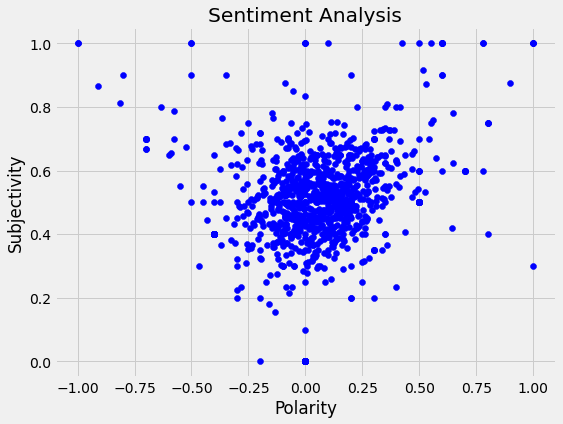

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
# get percentage of positive comments
pcom=df[df.Analysis=='Positive']
pcom=pcom['content']

round((pcom.shape[0]/df.shape[0])*100,1)

53.2

In [ ]:
# get percentage of negative comments
ncom=df[df.Analysis=='Negative']
ncom=ncom['content']

round((ncom.shape[0]/df.shape[0])*100,1)

34.9

In [ ]:
# export csv

df.to_csv("sentiment_analysis.csv")